Example loading in model data and looking at some diagnostics.

/Users/rbrady0110/micromamba/envs/doubles/lib/python3.13/site-packages/lenstronomy/Data/psf.py:95: UserWarning: Input PSF model has at least one negative element, which is unphysical except for a PSF of an interferometric array.
  warnings.warn(
/Users/rbrady0110/micromamba/envs/doubles/lib/python3.13/site-packages/lenstronomy/Plots/model_band_plot.py:161: RuntimeWarning: invalid value encountered in log10
  np.log10(self._data),
/var/folders/74/9yc0dt9d53z15d2qpmgpxv4h0000gn/T/ipykernel_81155/568165021.py:29: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  f_main.show()
/Users/rbrady0110/micromamba/envs/doubles/lib/python3.13/site-packages/lenstronomy/Plots/model_band_plot.py:1121: RuntimeWarning: divide by zero encountered in log10
  np.log10(model),
/Users/rbrady0110/micromamba/envs/doubles/lib/python3.13/site-packages/lenstronomy/Plots/model_band_plot.py:1121: RuntimeWarning: invalid value encountered in log10
  np.log10(model),


-1.0871297966309628 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  1.0871297966309625


/var/folders/74/9yc0dt9d53z15d2qpmgpxv4h0000gn/T/ipykernel_81155/568165021.py:32: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  f_sep.show()
/Users/rbrady0110/micromamba/envs/doubles/lib/python3.13/site-packages/lenstronomy/Plots/model_band_plot.py:1181: RuntimeWarning: invalid value encountered in log10
  np.log10(self._data - model),
/var/folders/74/9yc0dt9d53z15d2qpmgpxv4h0000gn/T/ipykernel_81155/568165021.py:35: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  f_res.show()


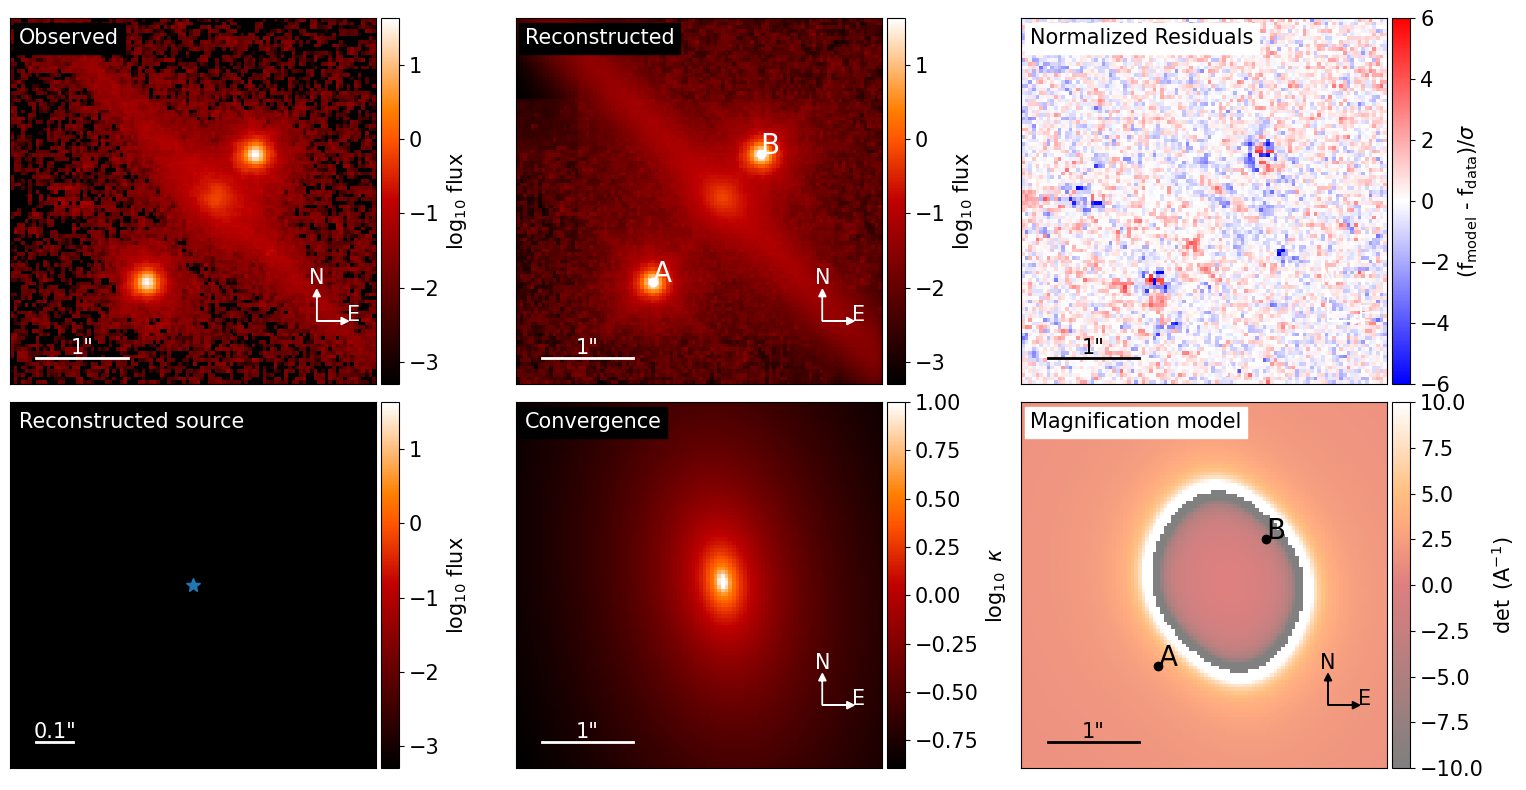

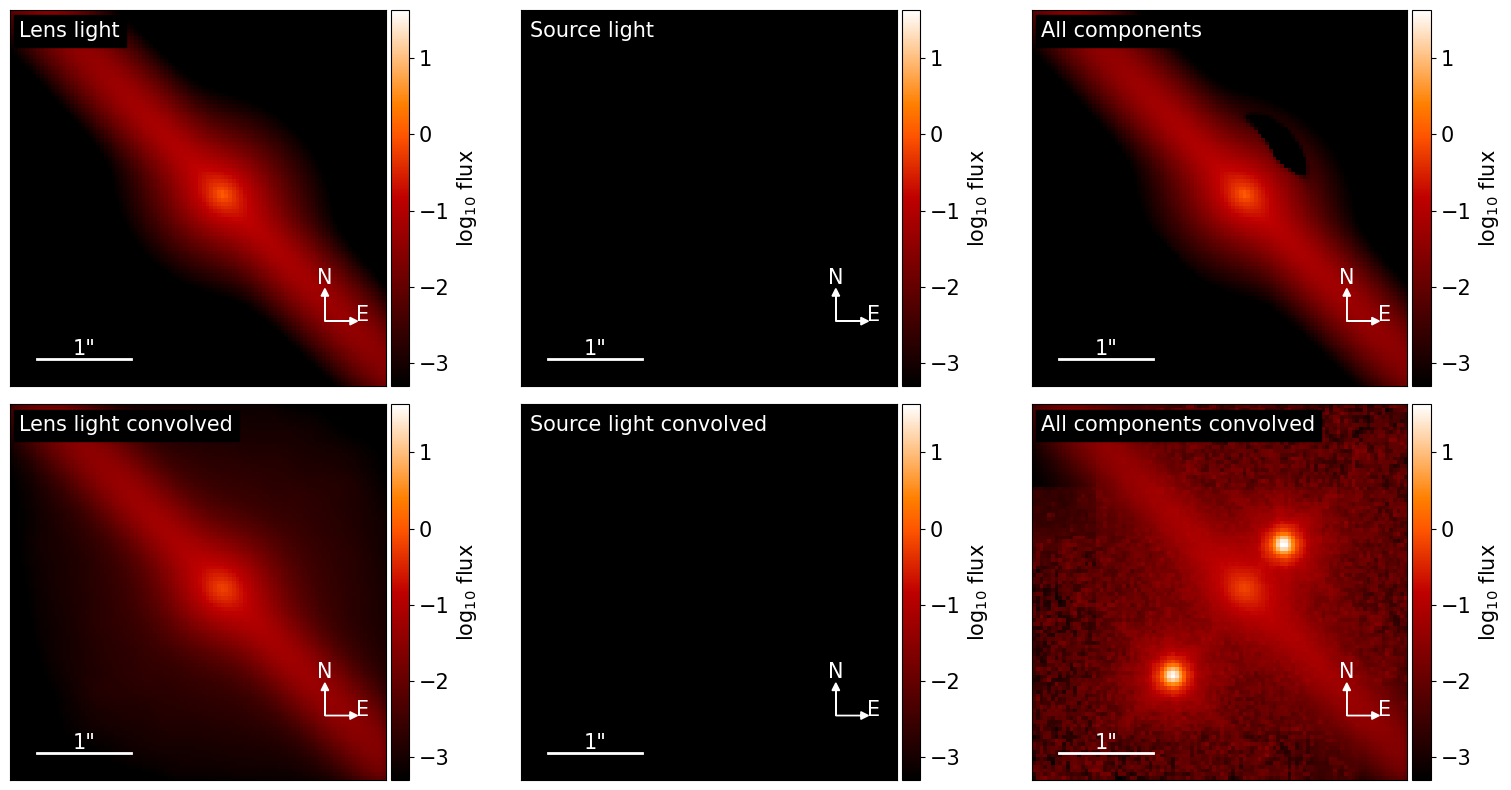

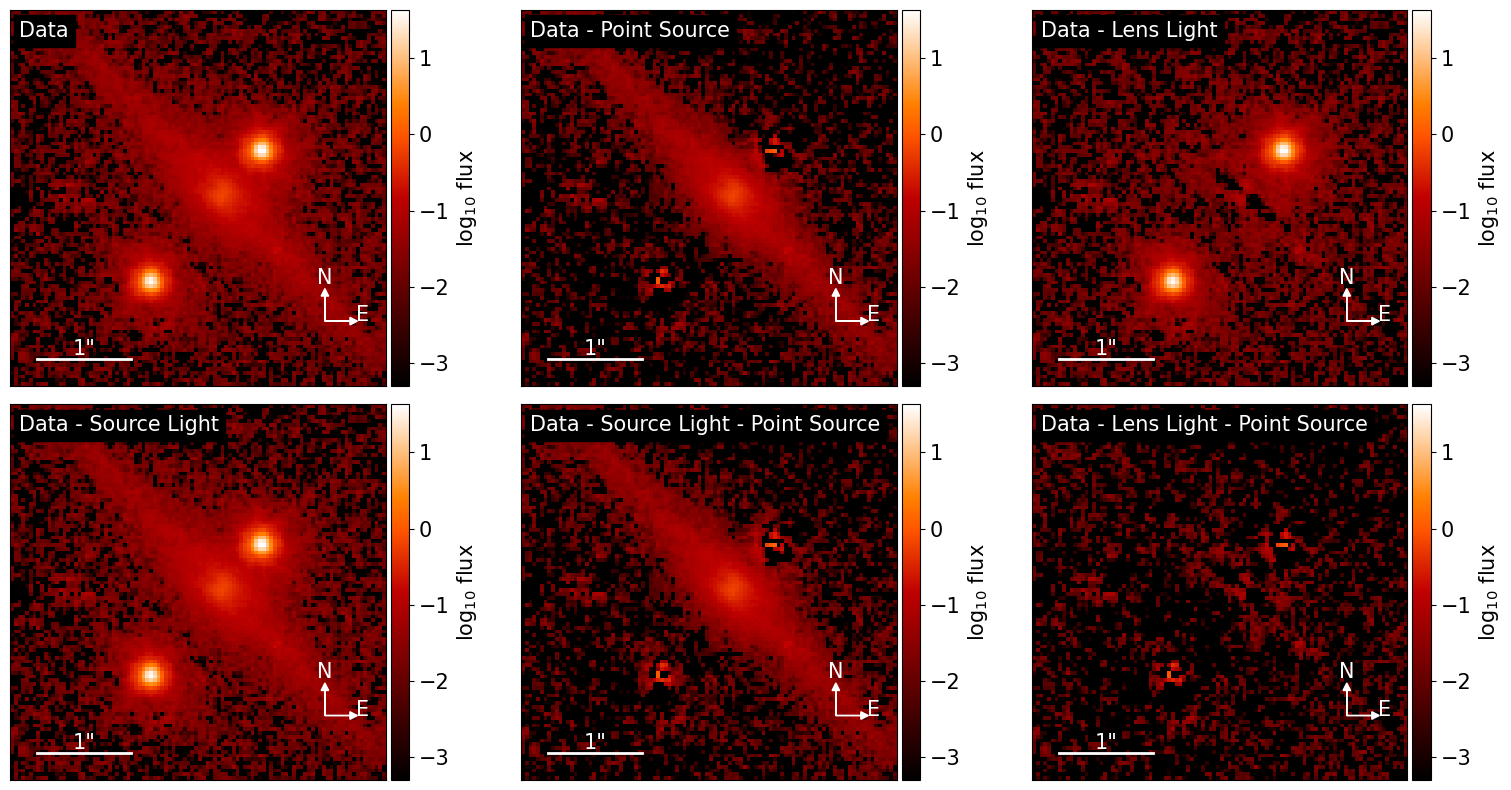

In [6]:
import pickle
from lenstronomy.Plots.model_plot import ModelPlot
from lenstronomy.Plots import chain_plot
from lenstronomy.Workflow.fitting_sequence import FittingSequence
import h5py
import corner
import numpy as np

name = "J0602-4335"
filter = "F475X"
filename = f"../cutout_data/{name}/{filter}/{name}_{filter}.pkl"

# load the saved data and plot the models
with open(filename, "rb") as f:
    loaded_data = pickle.load(f)

kwargs_result = loaded_data["kwargs_result"]
multi_band_list = loaded_data["multi_band_list"]
kwargs_model = loaded_data["kwargs_model"]
kwargs_params = loaded_data.get("kwargs_params", None)
chain_list = loaded_data.get('chain_list')
kwargs_constraints = loaded_data.get("kwargs_constraints", None)
kwargs_likelihood = loaded_data.get("kwargs_likelihood", None)
kwargs_data_joint = loaded_data.get("kwargs_data_joint", None)

modelPlot = ModelPlot(multi_band_list, kwargs_model, kwargs_result, arrow_size=0.02, cmap_string="gist_heat")

f_main, axes_main = modelPlot.plot_main()
f_main.show()

f_sep, axes_sep = modelPlot.plot_separate()
f_sep.show()

f_res, axes_res = modelPlot.plot_subtract_from_data_all()
f_res.show()

Image AB Magnitudes: [19.86818508 19.68626604]
Lens AB Magnitude: 20.801549381821964


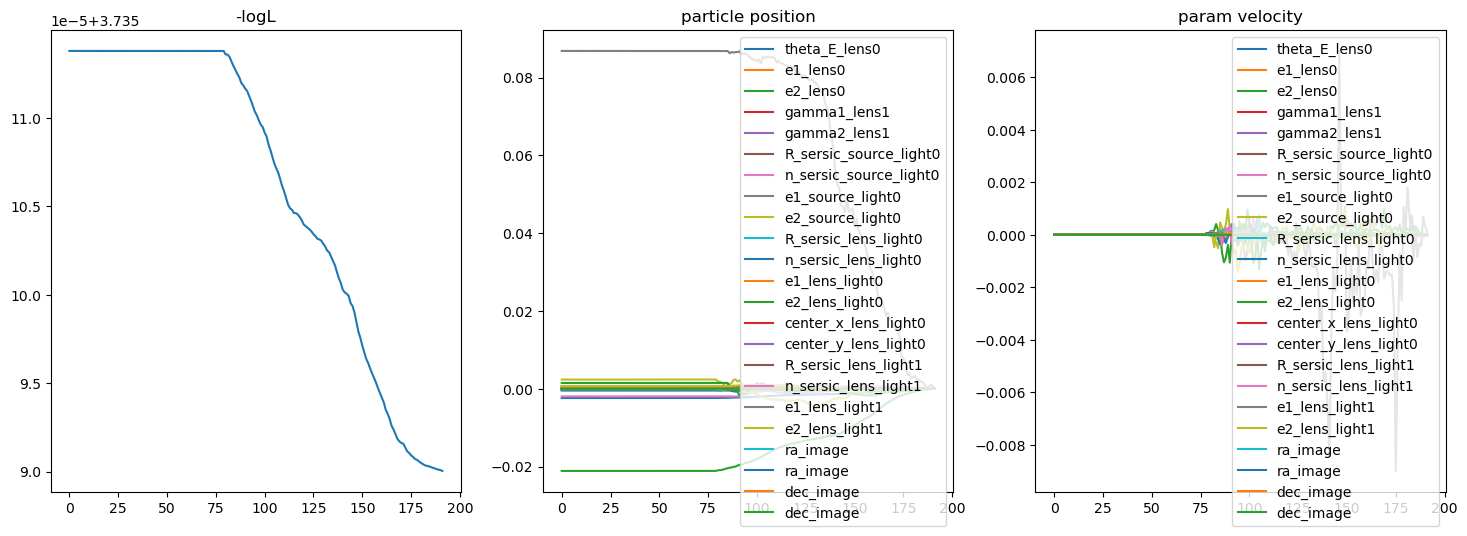

<Figure size 640x480 with 0 Axes>

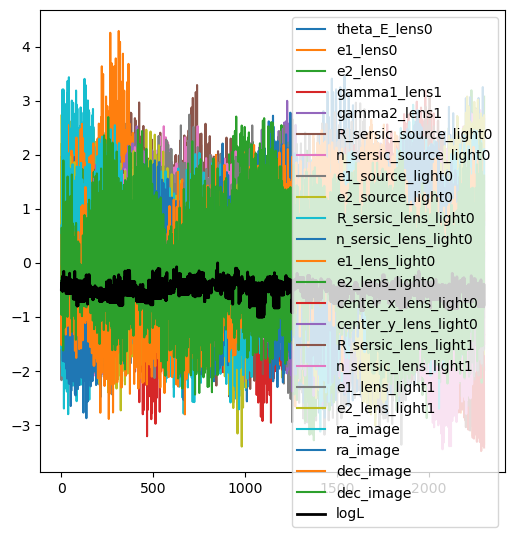

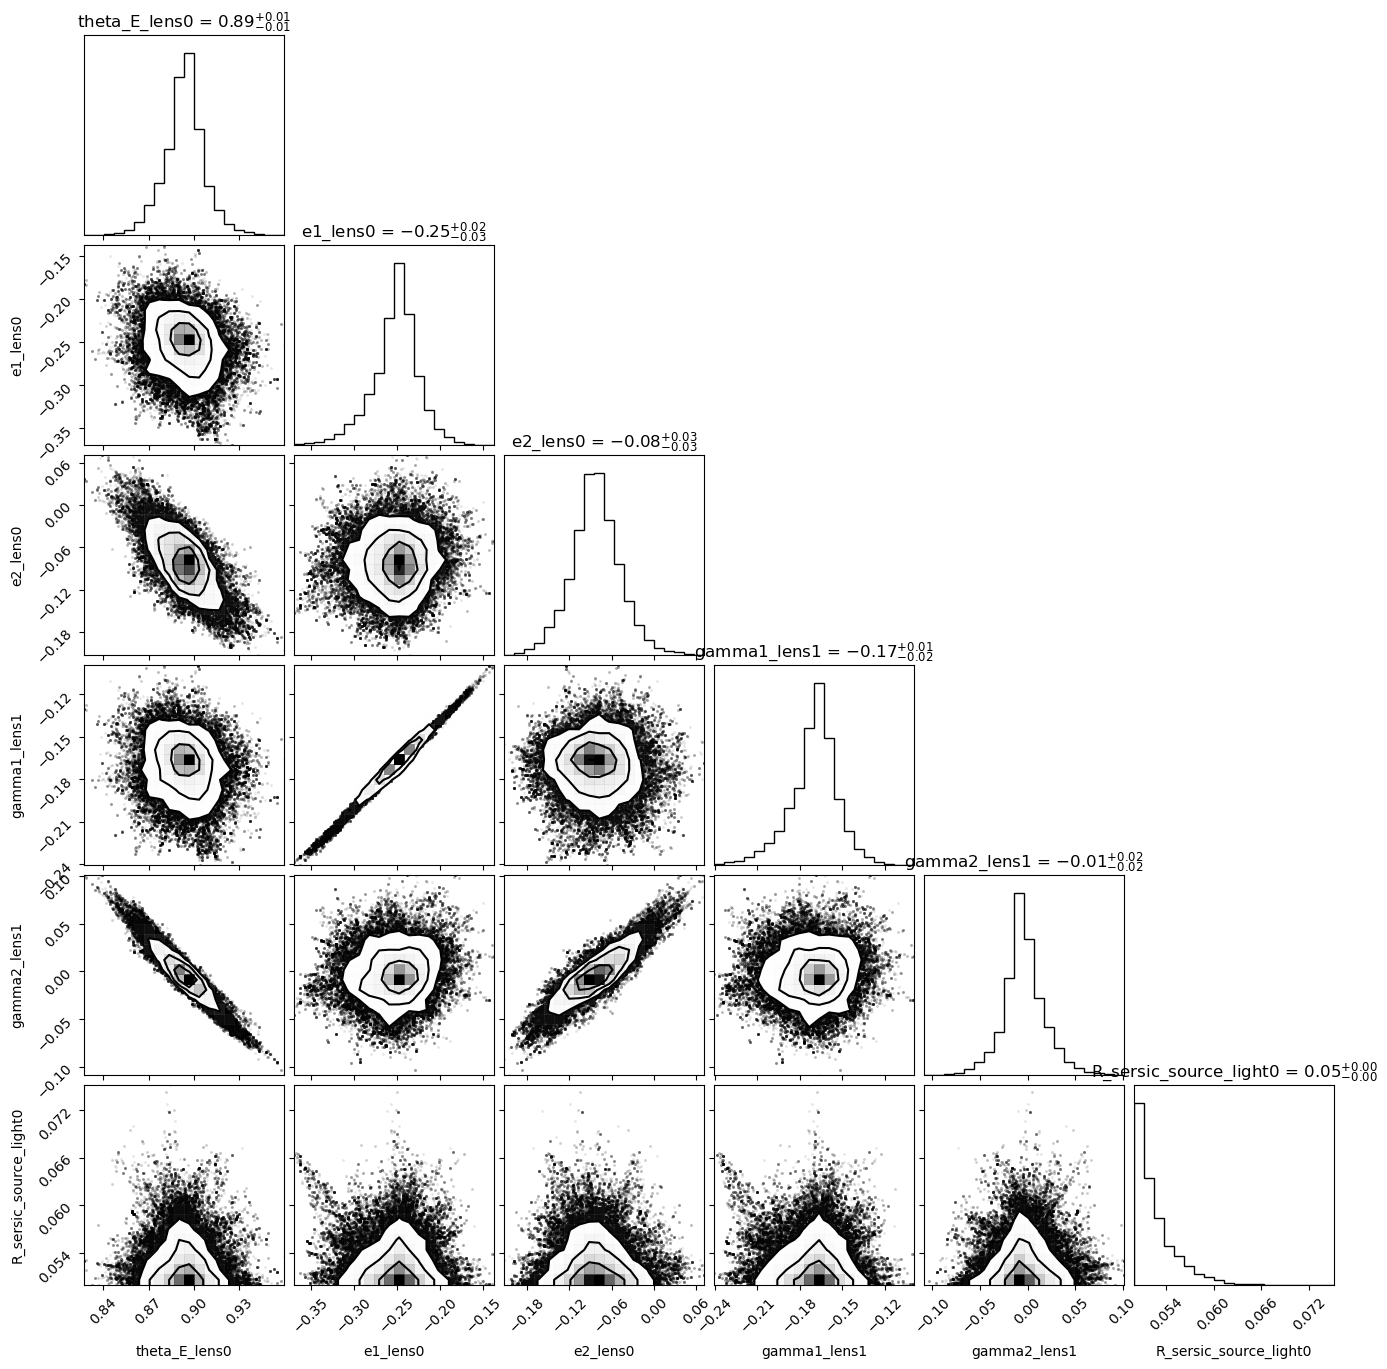

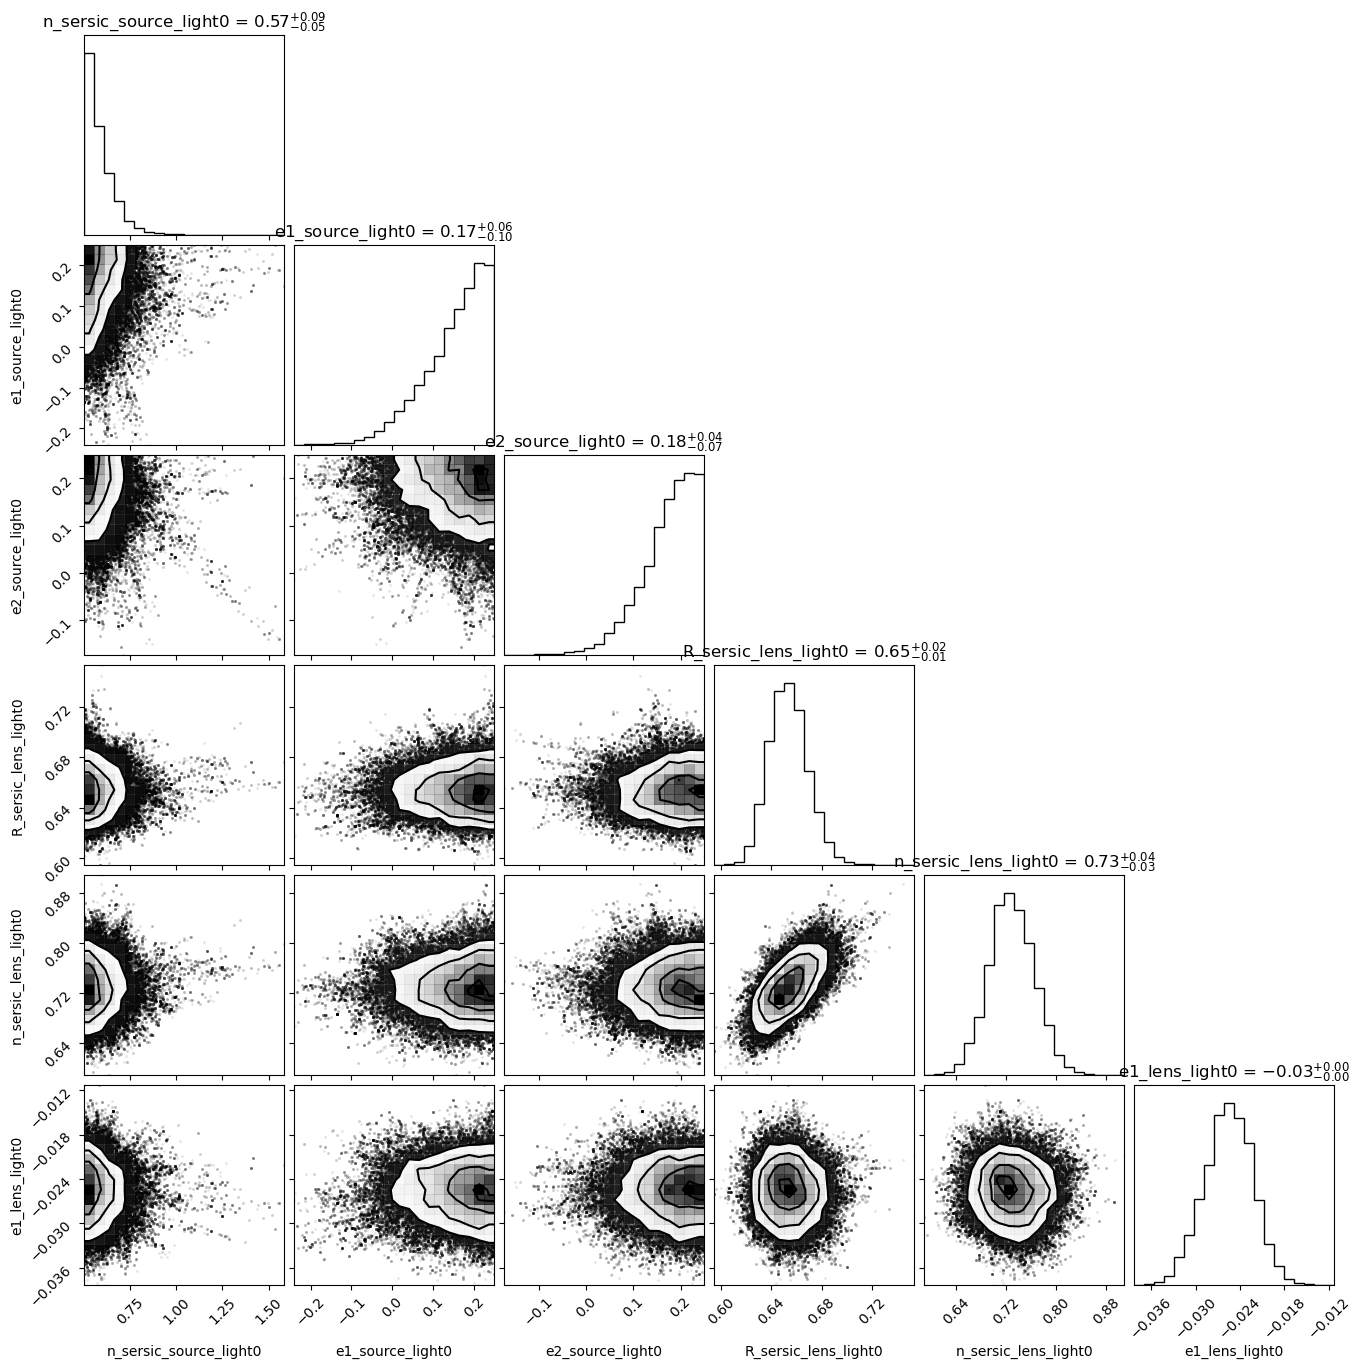

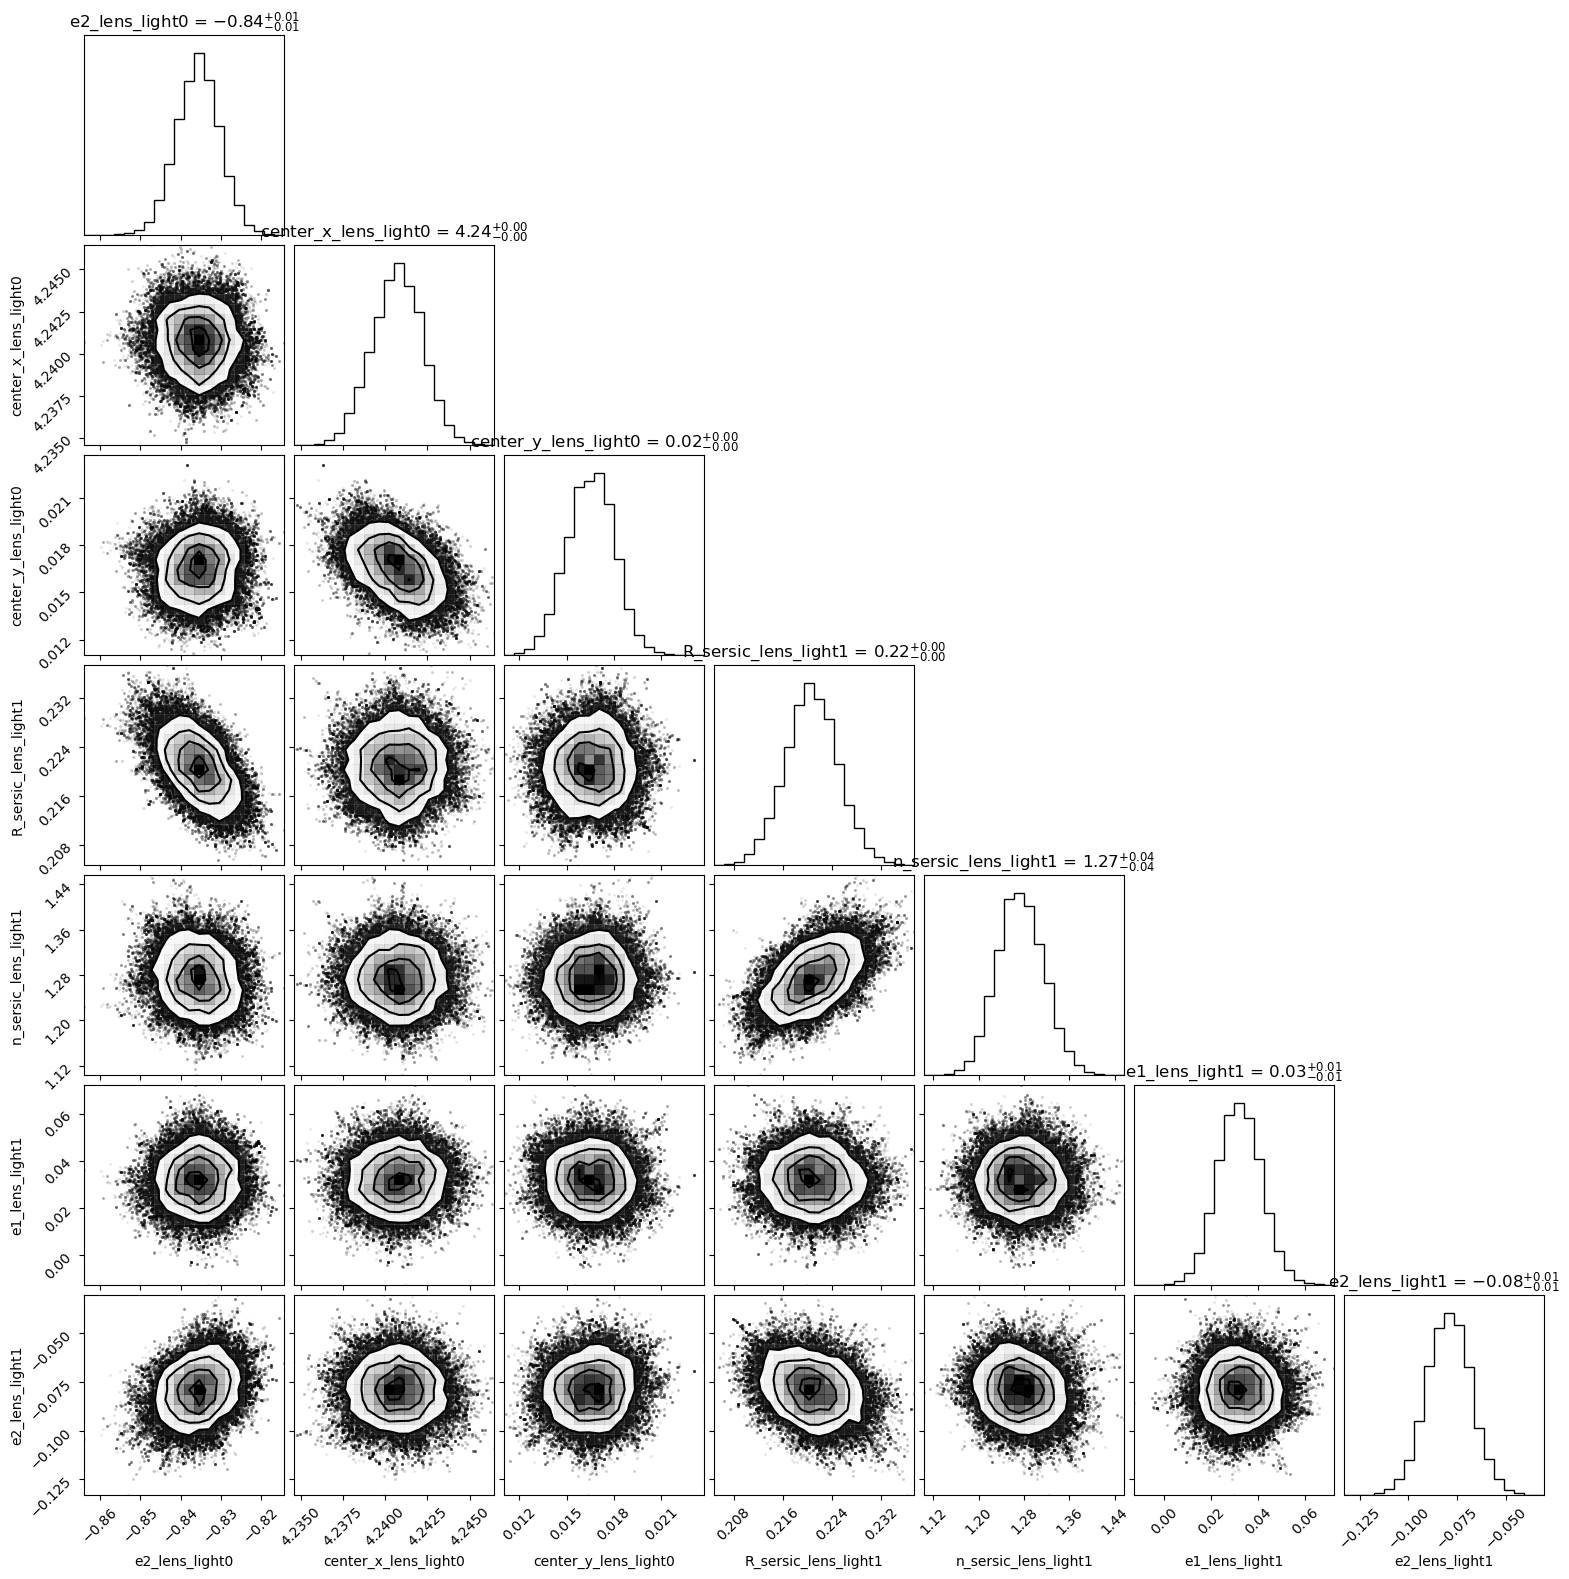

In [7]:
fitting_seq = FittingSequence(kwargs_data_joint, kwargs_model, kwargs_constraints, kwargs_likelihood, kwargs_params)

filename = f"../cutout_data/{name}/{filter}/{name}_{filter}_final.hdf5"

# print some of the final results
with h5py.File(filename, "r") as f:
    kwargs = {}
    for key in f:
        kwargs[key] = f[key][()]

print('Image AB Magnitudes:', kwargs['image_mags'])
print('Lens AB Magnitude:', kwargs['lens_mag'])

# analyze the PSO and MCMC
param = fitting_seq.param_class

for i in range(len(chain_list)):
    chain_plot.plot_chain_list(chain_list, i)

sampler_type, samples_mcmc, param_mcmc, dist_mcmc  = chain_list[1]

if samples_mcmc.size != 0:
    n, num_param = np.shape(samples_mcmc)
    plot = corner.corner(samples_mcmc[:, :6], labels=param_mcmc[:6], show_titles=True)
    plot = corner.corner(samples_mcmc[:, 6:12], labels=param_mcmc[6:12], show_titles=True)
    plot = corner.corner(samples_mcmc[:, 12:19], labels=param_mcmc[12:19], show_titles=True)